# House Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import plotly.graph_objs as go 

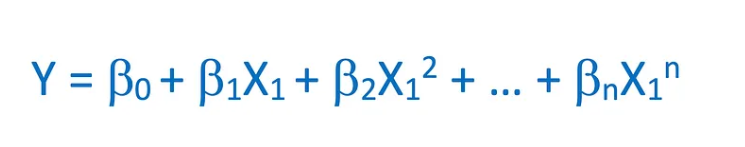

In [ ]:
DATA_DIR = '..\..\#DATA'
data_path = DATA_DIR + '\House_Price_Prediction\data.xlsx'

data = pd.read_excel(data_path)
data.head()

,taille_en_pieds_carre,nb_chambres,prix
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   taille_en_pieds_carre  47 non-null     int64
 1   nb_chambres            47 non-null     int64
 2   prix                   47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [5]:
data.isna().sum()

taille_en_pieds_carre    0
nb_chambres              0
prix                     0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe()

,taille_en_pieds_carre,nb_chambres,prix
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Data Visualisation

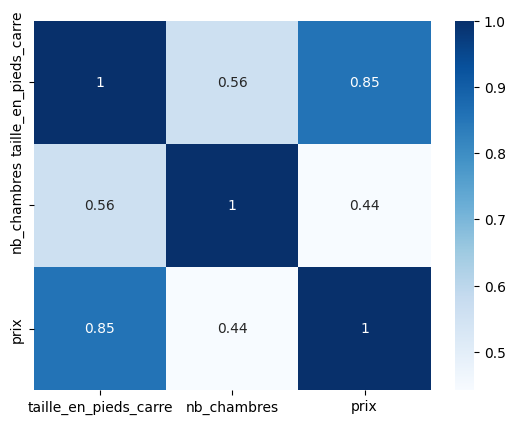

In [8]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.show()

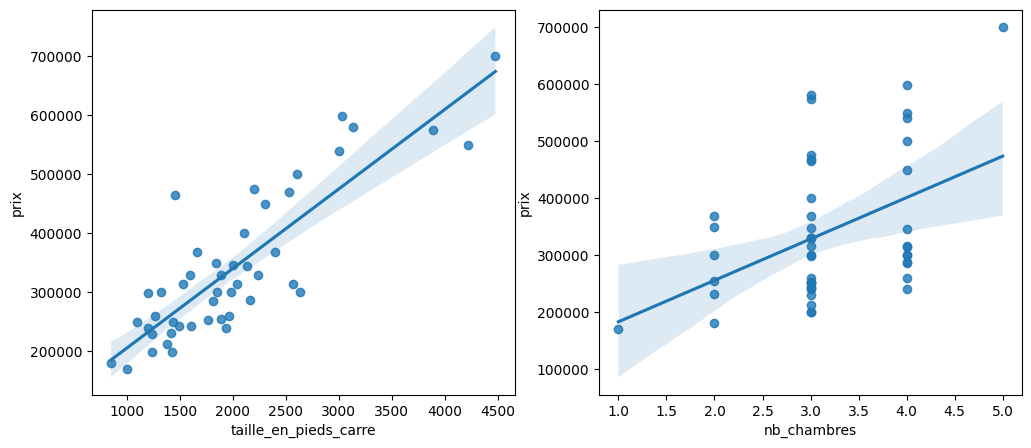

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x="taille_en_pieds_carre", y="prix", data=data, ax=axes[0])

sns.regplot(x="nb_chambres", y="prix", data=data, ax=axes[1])

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12404\1187561329.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['prix'])


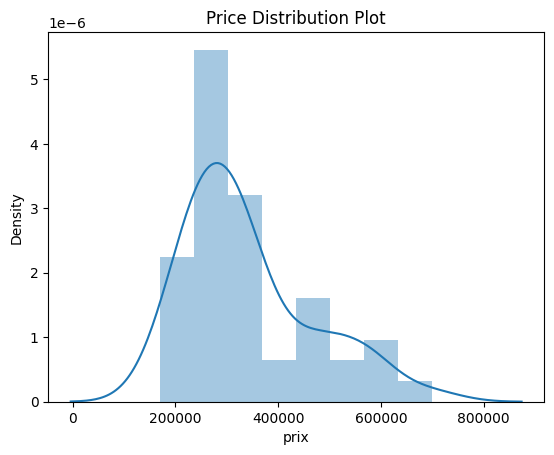

In [10]:
plt.title('Price Distribution Plot')
sns.distplot(data['prix'])
plt.show()

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=data['taille_en_pieds_carre'], y=data['nb_chambres'], z=data['prix'],
                           mode='markers'))

fig.update_layout(scene=dict(xaxis_title='taille_en_pieds_carre',
                             yaxis_title='nb_chambres',
                             zaxis_title='prix'),
                  margin=dict(l=0, r=0, b=0, t=40))

## Modeling

In [12]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(X.shape, y.shape)

(47, 2) (47,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37, 2), (10, 2), (37,), (10,))

In [14]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4)
X_train_poly = pr.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

## Evaluation

In [15]:
# Test polynomial regression model on the training dataset
print("The training score: ", lr.score(X_train_poly, y_train))

# Test polynomial regression model on the test dataset
X_test_poly = pr.transform(X_test)
print("The testing score: ", lr.score(X_test_poly, y_test))

The training score:  0.8105592836333972
The testing score:  0.5959171499744529


In [16]:
X_poly = pr.transform(X)
predicted_price = lr.predict(X_poly)

In [22]:
# Create a meshgrid over a reasonable range of values
x1_range = np.linspace(data['taille_en_pieds_carre'].min(), data['taille_en_pieds_carre'].max(), 50)
x2_range = np.linspace(data['nb_chambres'].min(), data['nb_chambres'].max(), 50)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Flatten the meshgrid and stack the features
X_pred = np.array([x1.flatten(), x2.flatten()]).T

# Transform the input data using the same PolynomialFeatures
X_pred_poly = pr.transform(X_pred)

# Make predictions
predicted_price = lr.predict(X_pred_poly)
predicted_price = predicted_price.reshape(x1.shape)  # Reshape to match the meshgrid

# Create the figure
fig = go.Figure()

# Add the actual data points
fig.add_trace(go.Scatter3d(
    x=data['taille_en_pieds_carre'], y=data['nb_chambres'], z=data['prix'],
    mode='markers', marker=dict(color='green', size=5), opacity=0.7, name='Actual Data'
))

# Add the predicted surface
fig.add_trace(go.Surface(
    x=x1, y=x2, z=predicted_price,
    colorscale='Reds', opacity=0.7, name='Polynomial Regression'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Taille en Pieds Carré',
        yaxis_title='Nombre de Chambres',
        zaxis_title='Prix'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    height=600, width=1000,
    title_text="Polynomial Regression"
)

# Show the figure
fig.show()

c:\Users\admin\Documents\machine-learning-for-beginners\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

